# XMM-LSS master catalogue
## Checks and diagnostics

In [1]:
from herschelhelp_internal import git_version
print("This notebook was run with herschelhelp_internal version: \n{}".format(git_version()))

This notebook was run with herschelhelp_internal version: 
91cdb7b (Fri Oct 20 11:48:11 2017 +0100) [with local modifications]


In [2]:
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
plt.style.use('ggplot')

import locale
locale.setlocale(locale.LC_ALL, 'en_GB')

import os
import time
import itertools

from astropy.coordinates import SkyCoord
from astropy.table import Table
from astropy import units as u
from astropy import visualization as vis
import numpy as np
from matplotlib_venn import venn3

from herschelhelp_internal.masterlist import nb_compare_mags, nb_ccplots, nb_histograms, quick_checks

/Users/rs548/anaconda/envs/herschelhelp_internal/lib/python3.6/site-packages/seaborn/apionly.py:6: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


In [3]:
OUT_DIR = os.environ.get('OUT_DIR', "./data")
SUFFIX = os.environ.get('SUFFIX', time.strftime("_%Y%m%d"))
#SUFFIX = "_20170627"

master_catalogue = Table.read("{}/master_catalogue_xmm-lss{}.fits".format(OUT_DIR, SUFFIX))

## 0 - Quick checks

In [ ]:
quick_checks(master_catalogue).show_in_notebook()

## I - Summary of wavelength domains

In [4]:
flag_obs = master_catalogue['flag_optnir_obs']
flag_det = master_catalogue['flag_optnir_det']

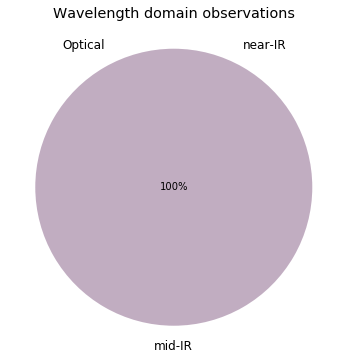

In [5]:
venn3(
    [
        np.sum(flag_obs == 4),
        np.sum(flag_obs == 2),
        np.sum(flag_obs == 6),
        np.sum(flag_obs == 1),
        np.sum(flag_obs == 5),
        np.sum(flag_obs == 3),
        np.sum(flag_obs == 7)
    ],
    set_labels=('Optical', 'near-IR', 'mid-IR'),
    subset_label_formatter=lambda x: "{}%".format(int(100*x/len(flag_obs)))
)
plt.title("Wavelength domain observations");

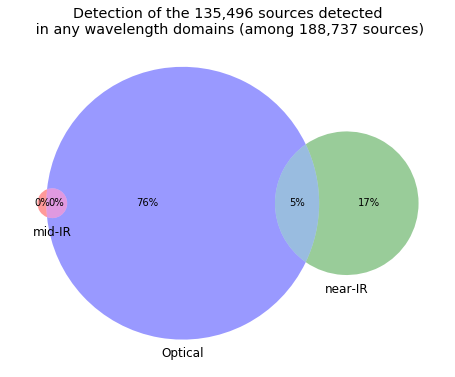

In [6]:
venn3(
    [
        np.sum(flag_det[flag_obs == 7] == 4),
        np.sum(flag_det[flag_obs == 7] == 2),
        np.sum(flag_det[flag_obs == 7] == 6),
        np.sum(flag_det[flag_obs == 7] == 1),
        np.sum(flag_det[flag_obs == 7] == 5),
        np.sum(flag_det[flag_obs == 7] == 3),
        np.sum(flag_det[flag_obs == 7] == 7)
    ],
    set_labels=('mid-IR', 'near-IR', 'Optical'),
    subset_label_formatter=lambda x: "{}%".format(int(100*x/np.sum(flag_det != 0)))
)
plt.title("Detection of the {} sources detected\n in any wavelength domains "
          "(among {} sources)".format(
              locale.format('%d', np.sum(flag_det != 0), grouping=True),
              locale.format('%d', len(flag_det), grouping=True)));

## II - Comparing magnitudes in similar filters

The master list if composed of several catalogues containing magnitudes in similar filters on different instruments. We are comparing the magnitudes in these corresponding filters.

In [7]:
u_bands = ["Megacam u"]
g_bands = ["Megacam g", "SUPRIME g", "GPC1 g", "DECam g"]
r_bands = ["Megacam r", "SUPRIME r", "GPC1 r", "DECam r"]
i_bands = [             "SUPRIME i", "GPC1 i", "DECam i"]
z_bands = ["Megacam z", "SUPRIME z", "GPC1 z", "DECam z", "VISTA z"]
y_bands = ["Megacam y", "SUPRIME y", "GPC1 y", "DECam y", "VISTA y"]
j_bands = [                                               "VISTA j", "UKIDSS j"]
h_bands = [                                               "VISTA h", "UKIDSS j"]
k_bands = [                                               "VISTA k", "UKIDSS j"]

### II.a - Comparing depths

We compare the histograms of the total aperture magnitudes of similar bands.

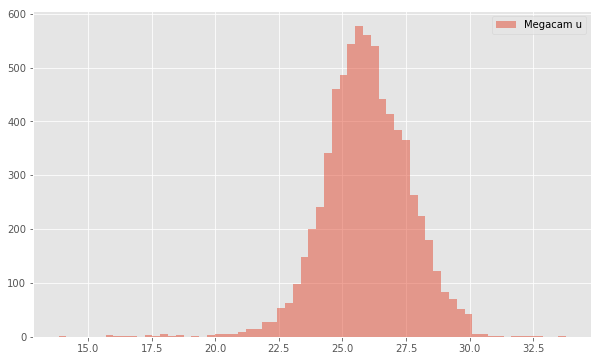

HELP warning: the column m_decam_g (DECam g) is empty.


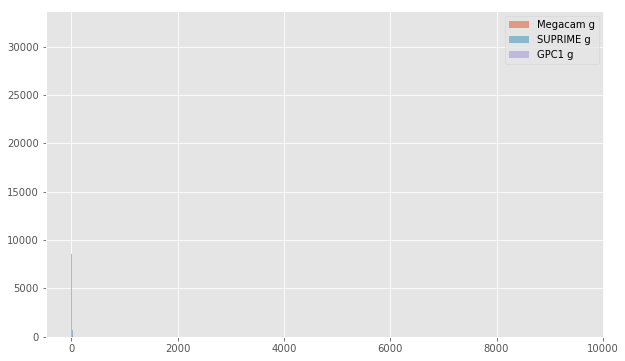

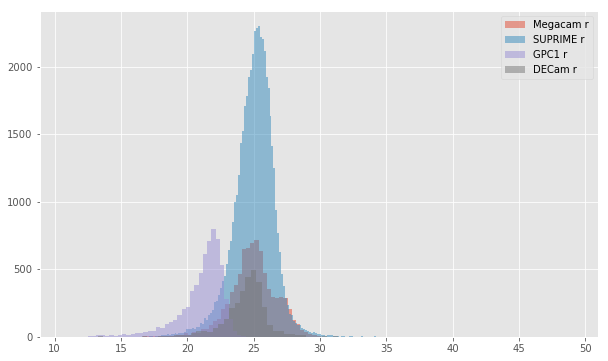

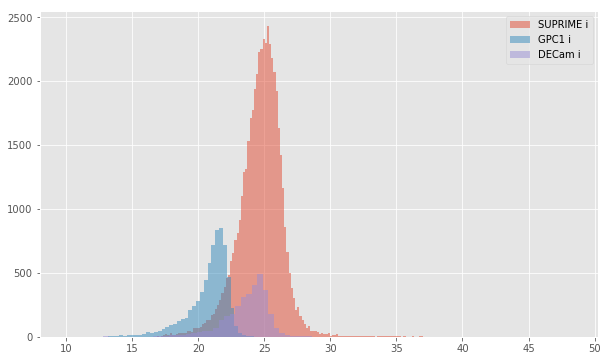

HELP warning: the column m_decam_z (DECam z) is empty.


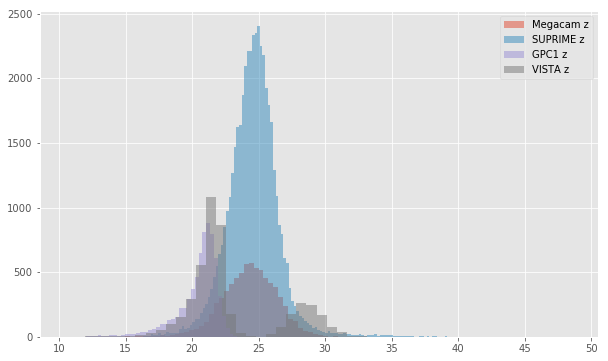

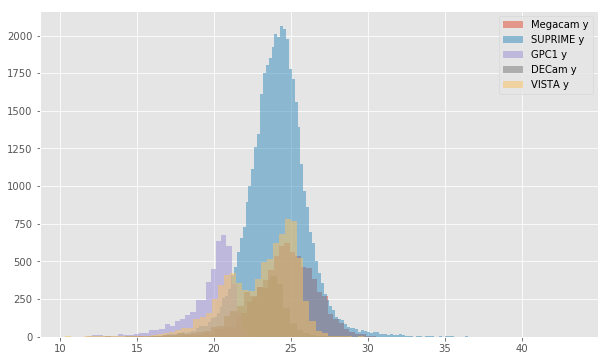

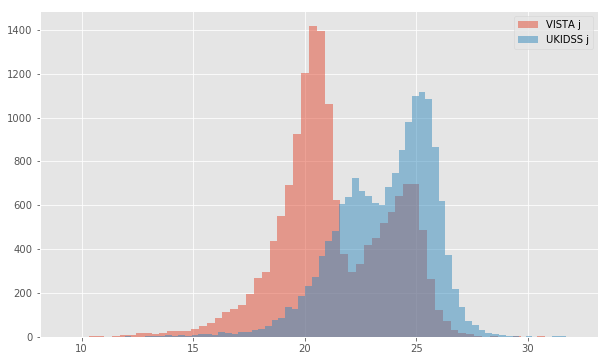

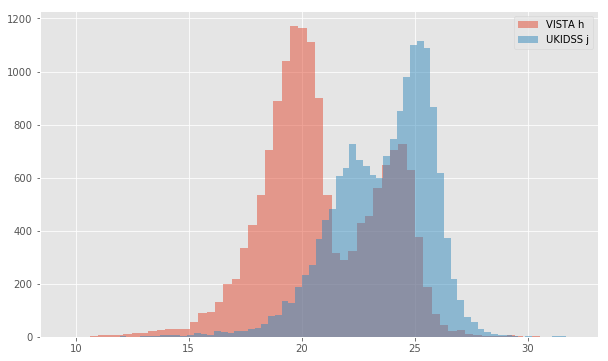

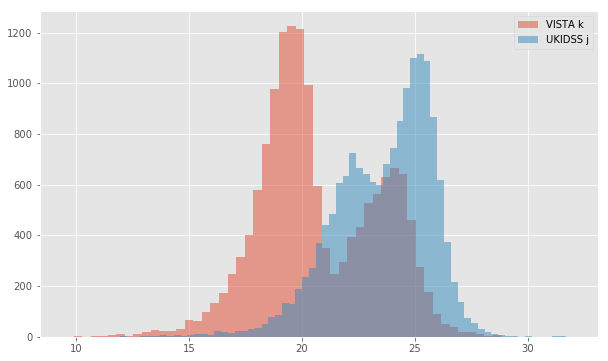

In [8]:
for bands in [u_bands, g_bands, r_bands, i_bands, z_bands, y_bands, j_bands, h_bands, k_bands]:
    colnames = ["m_{}".format(band.replace(" ", "_").lower()) for band in bands]
    nb_histograms(master_catalogue, colnames, bands)

### II.b - Comparing magnitudes

We compare one to one each magnitude in similar bands.

No sources have both Megacam g (aperture) and SUPRIME g (aperture) values.
No sources have both Megacam g (total) and SUPRIME g (total) values.
No sources have both Megacam g (aperture) and GPC1 g (aperture) values.
No sources have both Megacam g (total) and GPC1 g (total) values.
No sources have both Megacam g (aperture) and DECam g (aperture) values.
No sources have both Megacam g (total) and DECam g (total) values.
GPC1 g (aperture) - SUPRIME g (aperture):
- Median: -0.33
- Median Absolute Deviation: 0.36
- 1% percentile: -2.045108470916748
- 99% percentile: 1.9172166824340815


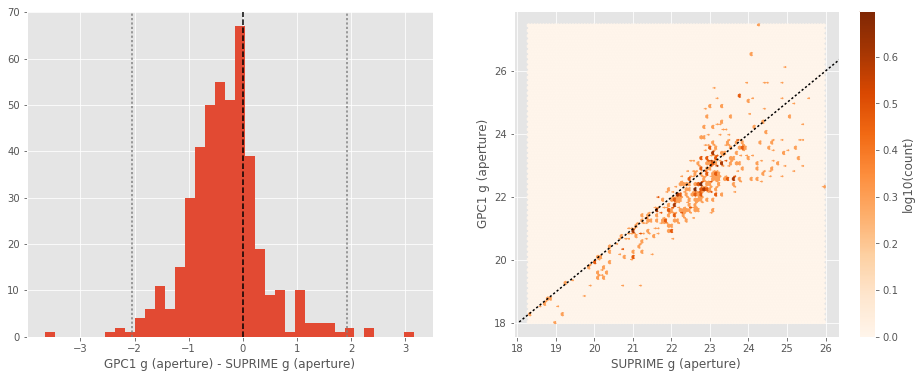

GPC1 g (total) - SUPRIME g (total):
- Median: 0.06
- Median Absolute Deviation: 0.20
- 1% percentile: -1.3669593048095703
- 99% percentile: 18.633380480543718


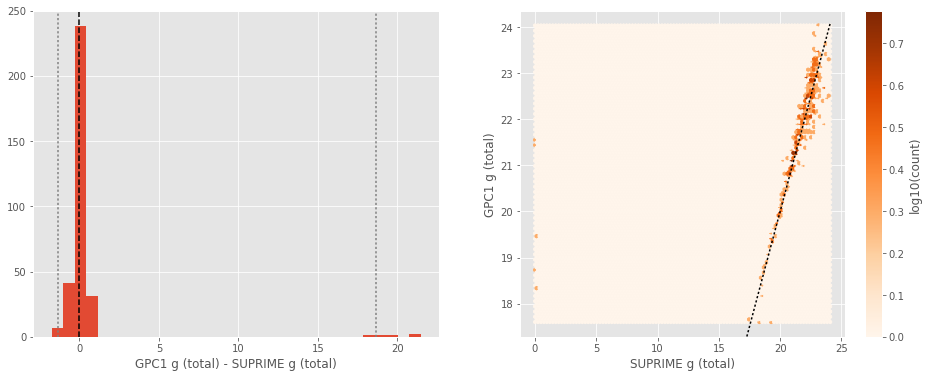

No sources have both SUPRIME g (aperture) and DECam g (aperture) values.
No sources have both SUPRIME g (total) and DECam g (total) values.
No sources have both GPC1 g (aperture) and DECam g (aperture) values.
No sources have both GPC1 g (total) and DECam g (total) values.
No sources have both Megacam r (aperture) and SUPRIME r (aperture) values.
No sources have both Megacam r (total) and SUPRIME r (total) values.
No sources have both Megacam r (aperture) and GPC1 r (aperture) values.
No sources have both Megacam r (total) and GPC1 r (total) values.
DECam r (aperture) - Megacam r (aperture):
- Median: 0.77
- Median Absolute Deviation: 0.37
- 1% percentile: -0.2565617561340332
- 99% percentile: 3.0563817214965794


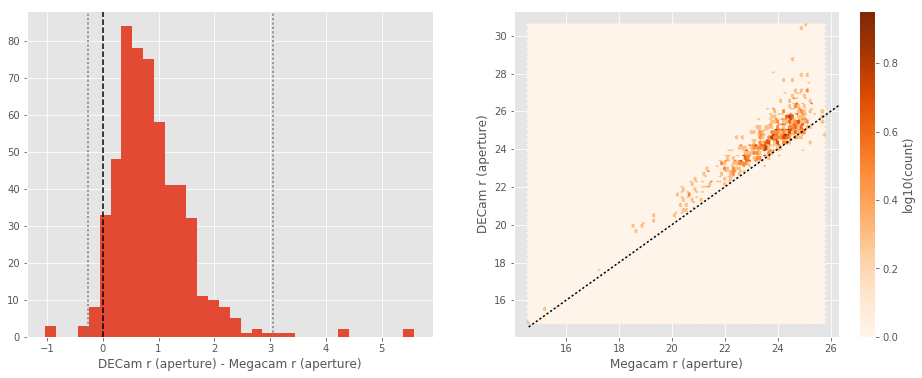

DECam r (total) - Megacam r (total):
- Median: 0.88
- Median Absolute Deviation: 0.39
- 1% percentile: -0.397382698059082
- 99% percentile: 4.031347503662079


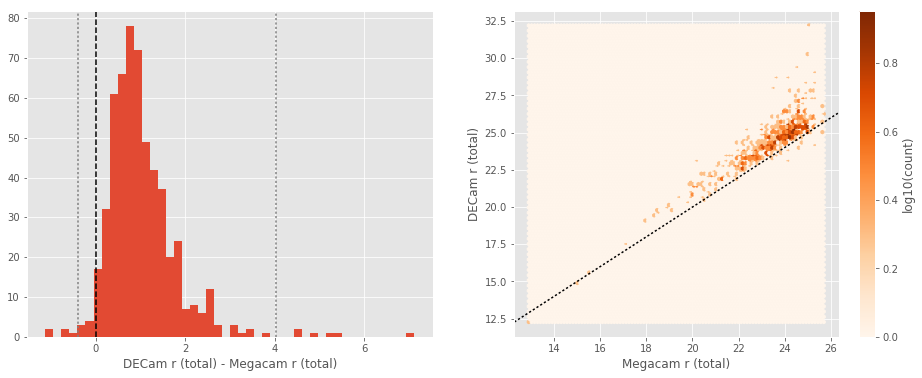

GPC1 r (aperture) - SUPRIME r (aperture):
- Median: -0.17
- Median Absolute Deviation: 0.24
- 1% percentile: -1.1817289352416993
- 99% percentile: 1.957823848724368


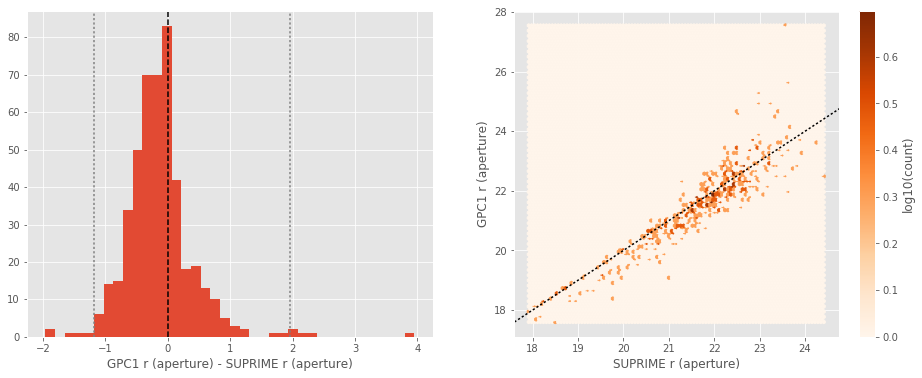

GPC1 r (total) - SUPRIME r (total):
- Median: 0.19
- Median Absolute Deviation: 0.14
- 1% percentile: -1.0707745552062988
- 99% percentile: 0.9201917648315441


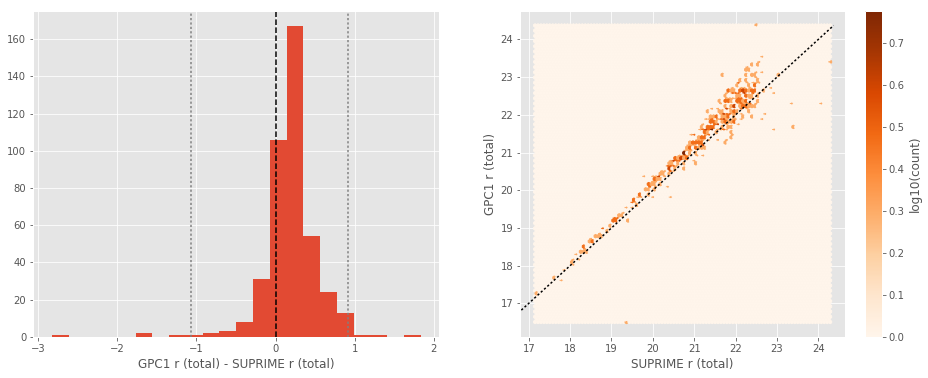

No sources have both SUPRIME r (aperture) and DECam r (aperture) values.
No sources have both SUPRIME r (total) and DECam r (total) values.
No sources have both GPC1 r (aperture) and DECam r (aperture) values.
No sources have both GPC1 r (total) and DECam r (total) values.
GPC1 i (aperture) - SUPRIME i (aperture):
- Median: -0.12
- Median Absolute Deviation: 0.21
- 1% percentile: -0.9467301368713379
- 99% percentile: 0.7614617347717285


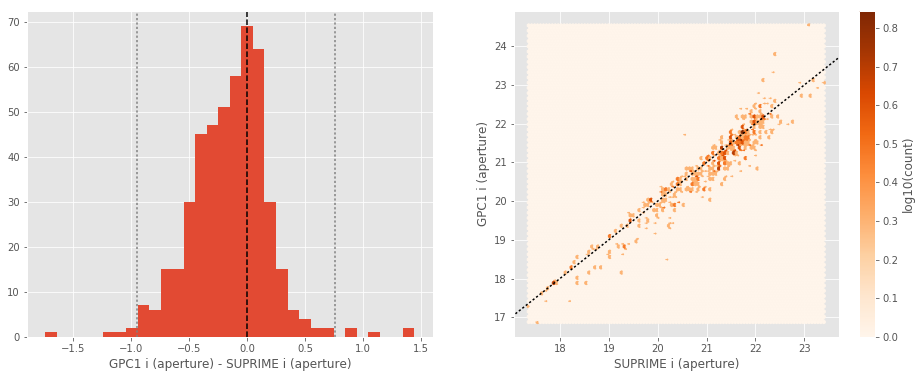

GPC1 i (total) - SUPRIME i (total):
- Median: 0.21
- Median Absolute Deviation: 0.11
- 1% percentile: -0.5527642822265625
- 99% percentile: 0.7933300209045409


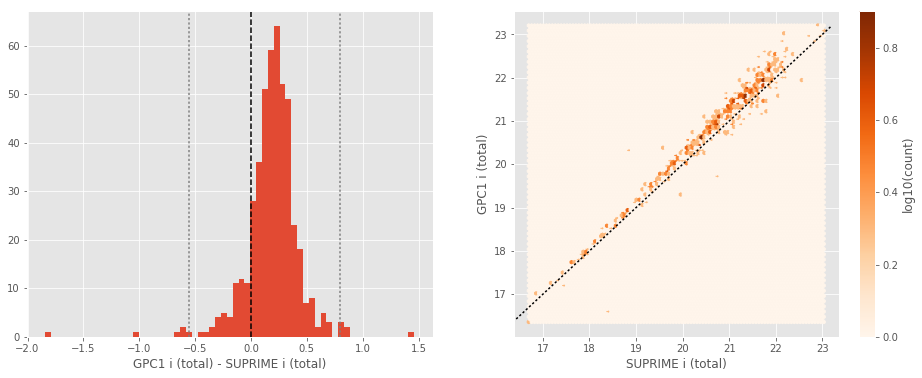

No sources have both SUPRIME i (aperture) and DECam i (aperture) values.
No sources have both SUPRIME i (total) and DECam i (total) values.
No sources have both GPC1 i (aperture) and DECam i (aperture) values.
No sources have both GPC1 i (total) and DECam i (total) values.
No sources have both Megacam z (aperture) and SUPRIME z (aperture) values.
No sources have both Megacam z (total) and SUPRIME z (total) values.
No sources have both Megacam z (aperture) and GPC1 z (aperture) values.
No sources have both Megacam z (total) and GPC1 z (total) values.
No sources have both Megacam z (aperture) and DECam z (aperture) values.
No sources have both Megacam z (total) and DECam z (total) values.
No sources have both Megacam z (aperture) and VISTA z (aperture) values.
No sources have both Megacam z (total) and VISTA z (total) values.
GPC1 z (aperture) - SUPRIME z (aperture):
- Median: -0.10
- Median Absolute Deviation: 0.17
- 1% percentile: -0.8348930358886718
- 99% percentile: 0.895587234497072

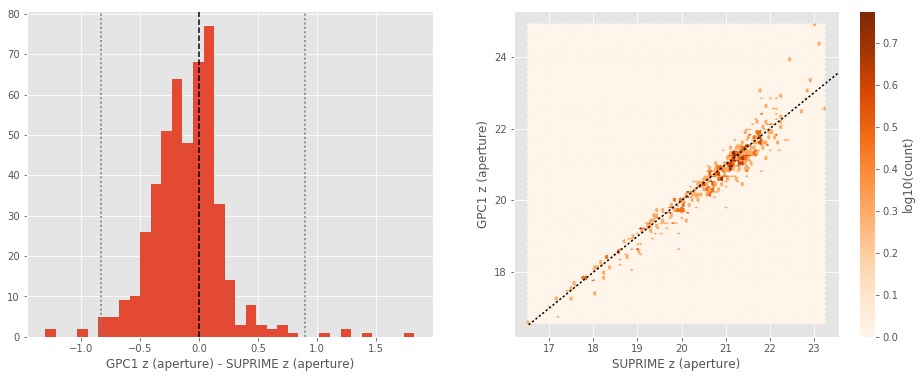

GPC1 z (total) - SUPRIME z (total):
- Median: 0.18
- Median Absolute Deviation: 0.12
- 1% percentile: -0.5370191955566406
- 99% percentile: 0.8070920181274415


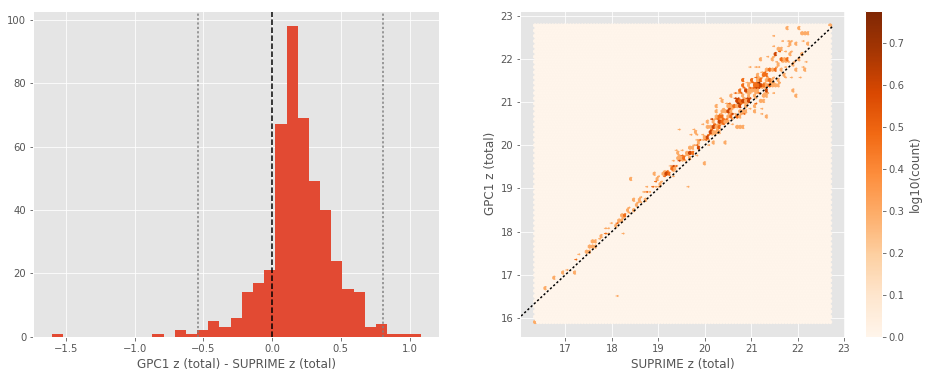

No sources have both SUPRIME z (aperture) and DECam z (aperture) values.
No sources have both SUPRIME z (total) and DECam z (total) values.
VISTA z (aperture) - SUPRIME z (aperture):
- Median: -0.52
- Median Absolute Deviation: 0.09
- 1% percentile: -3.6789566230773922
- 99% percentile: -0.0728634071350098


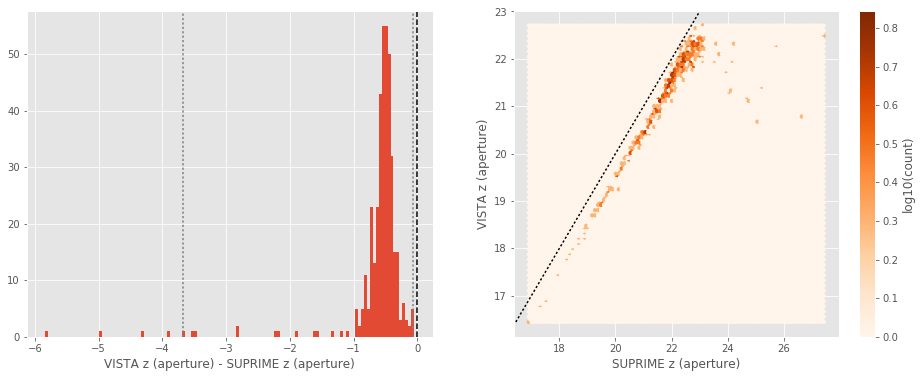

VISTA z (total) - SUPRIME z (total):
- Median: -0.50
- Median Absolute Deviation: 0.21
- 1% percentile: -2.3449848556518553
- 99% percentile: 0.9178753280639653


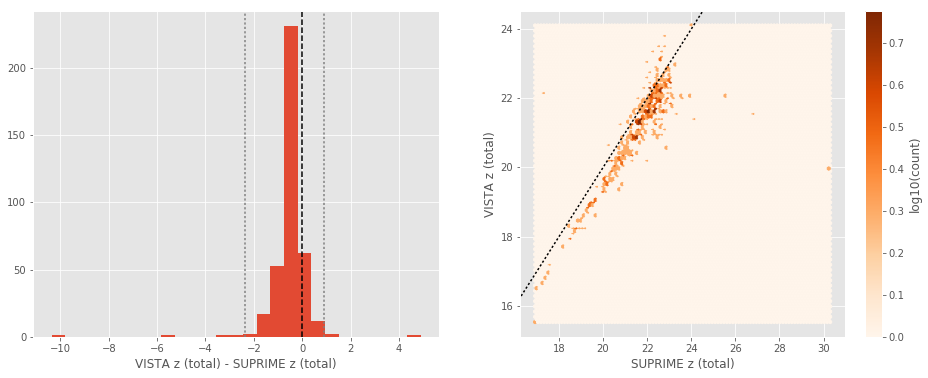

No sources have both GPC1 z (aperture) and DECam z (aperture) values.
No sources have both GPC1 z (total) and DECam z (total) values.
No sources have both GPC1 z (aperture) and VISTA z (aperture) values.
No sources have both GPC1 z (total) and VISTA z (total) values.
No sources have both DECam z (aperture) and VISTA z (aperture) values.
No sources have both DECam z (total) and VISTA z (total) values.
No sources have both Megacam y (aperture) and SUPRIME y (aperture) values.
No sources have both Megacam y (total) and SUPRIME y (total) values.
No sources have both Megacam y (aperture) and GPC1 y (aperture) values.
No sources have both Megacam y (total) and GPC1 y (total) values.
DECam y (aperture) - Megacam y (aperture):
- Median: -0.25
- Median Absolute Deviation: 0.33
- 1% percentile: -1.2828766632080078
- 99% percentile: 2.3638948059082043


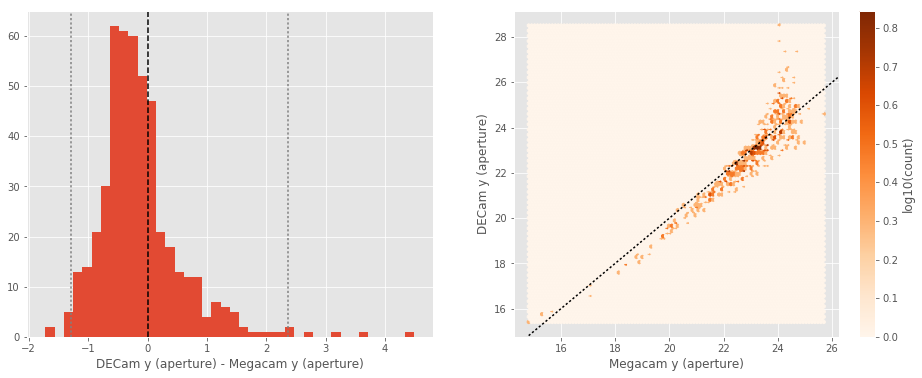

DECam y (total) - Megacam y (total):
- Median: -0.17
- Median Absolute Deviation: 0.31
- 1% percentile: -1.2686559295654298
- 99% percentile: 2.2842670059204058


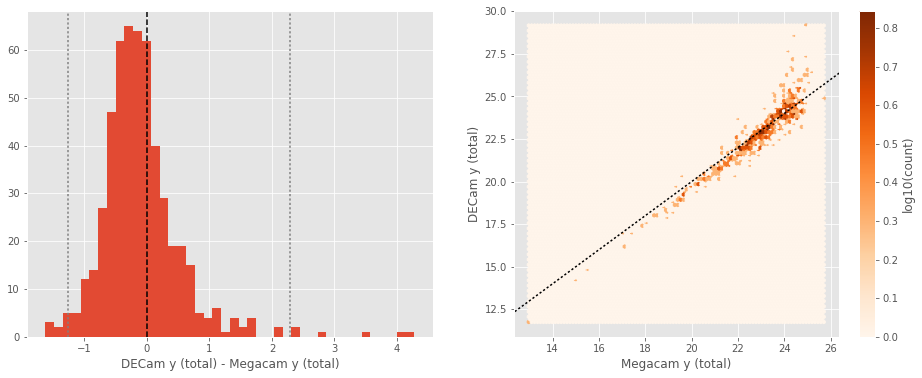

No sources have both Megacam y (aperture) and VISTA y (aperture) values.
No sources have both Megacam y (total) and VISTA y (total) values.
GPC1 y (aperture) - SUPRIME y (aperture):
- Median: -0.08
- Median Absolute Deviation: 0.25
- 1% percentile: -1.3578881645202636
- 99% percentile: 1.4828217506408647


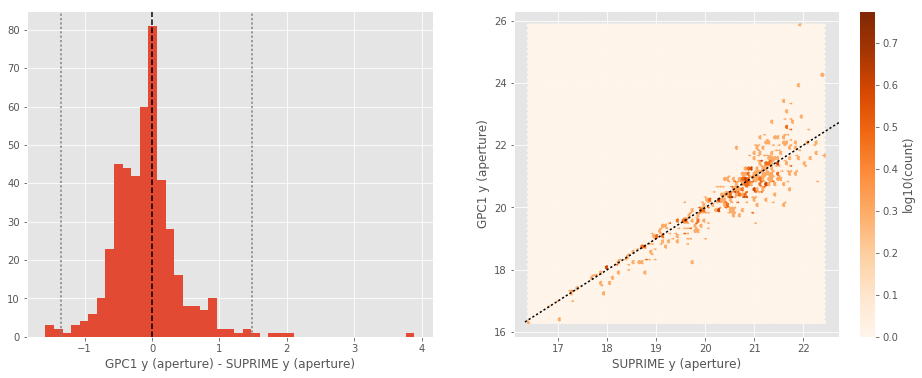

GPC1 y (total) - SUPRIME y (total):
- Median: 0.22
- Median Absolute Deviation: 0.16
- 1% percentile: -0.7542655944824218
- 99% percentile: 0.9658814239501949


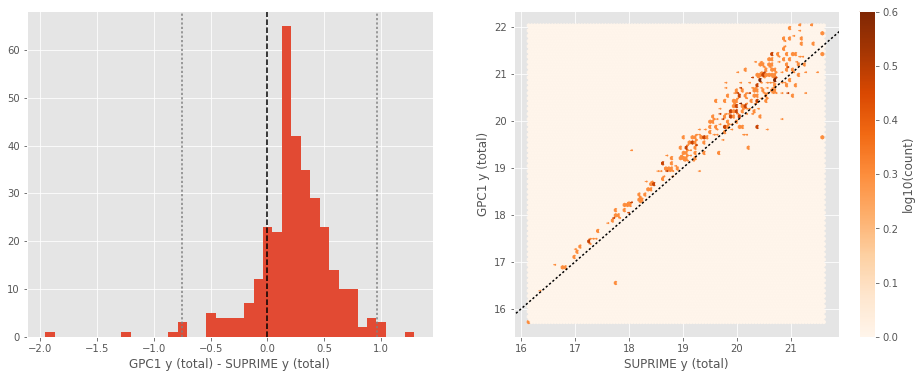

No sources have both SUPRIME y (aperture) and DECam y (aperture) values.
No sources have both SUPRIME y (total) and DECam y (total) values.
VISTA y (aperture) - SUPRIME y (aperture):
- Median: -0.72
- Median Absolute Deviation: 0.08
- 1% percentile: -1.583310089111328
- 99% percentile: -0.2410603332519532


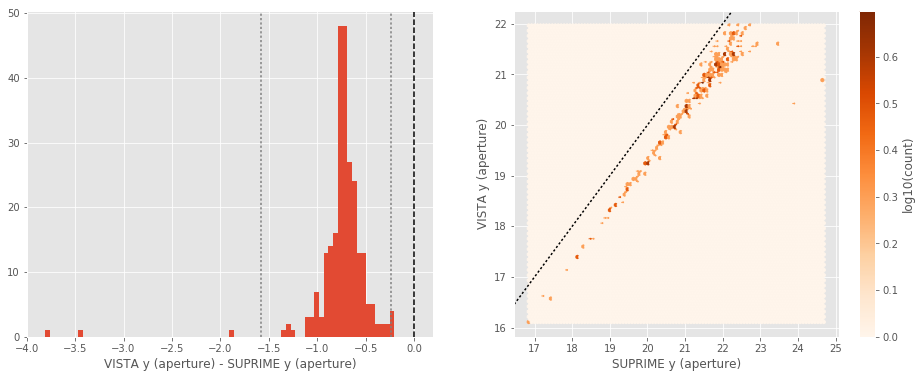

VISTA y (total) - SUPRIME y (total):
- Median: -0.69
- Median Absolute Deviation: 0.19
- 1% percentile: -1.616013011932373
- 99% percentile: 0.2950274276733406


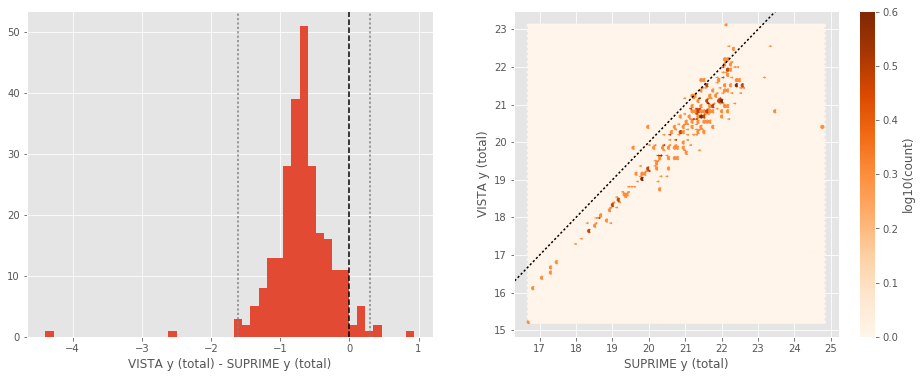

No sources have both GPC1 y (aperture) and DECam y (aperture) values.
No sources have both GPC1 y (total) and DECam y (total) values.
No sources have both GPC1 y (aperture) and VISTA y (aperture) values.
No sources have both GPC1 y (total) and VISTA y (total) values.
No sources have both DECam y (aperture) and VISTA y (aperture) values.
No sources have both DECam y (total) and VISTA y (total) values.
No sources have both VISTA j (aperture) and UKIDSS j (aperture) values.
No sources have both VISTA j (total) and UKIDSS j (total) values.
No sources have both VISTA h (aperture) and UKIDSS j (aperture) values.
No sources have both VISTA h (total) and UKIDSS j (total) values.
No sources have both VISTA k (aperture) and UKIDSS j (aperture) values.
No sources have both VISTA k (total) and UKIDSS j (total) values.


In [9]:
for band_of_a_kind in [u_bands, g_bands, r_bands, i_bands, z_bands, y_bands, j_bands, h_bands, k_bands]:
    for band1, band2 in itertools.combinations(band_of_a_kind, 2):
        
        basecol1, basecol2 = band1.replace(" ", "_").lower(), band2.replace(" ", "_").lower()
        
        col1, col2 = "m_ap_{}".format(basecol1), "m_ap_{}".format(basecol2)
        nb_compare_mags(master_catalogue[col1], master_catalogue[col2], 
                        labels=("{} (aperture)".format(band1), "{} (aperture)".format(band2)))
        
        col1, col2 = "m_{}".format(basecol1), "m_{}".format(basecol2)
        nb_compare_mags(master_catalogue[col1], master_catalogue[col2], 
                        labels=("{} (total)".format(band1), "{} (total)".format(band2)))

## III - Comparing magnitudes to reference bands

Cross-match the master list to SDSS and 2MASS to compare its magnitudes to SDSS and 2MASS ones.

In [10]:
master_catalogue_coords = SkyCoord(master_catalogue['ra'], master_catalogue['dec'])

### III.a - Comparing u, g, r, i, and z bands to SDSS

The catalogue is cross-matched to SDSS-DR13 withing 0.2 arcsecond. 

We compare the u, g, r, i, and z magnitudes to those from SDSS using `fiberMag` for the aperture magnitude and `petroMag`  for the total magnitude.

In [11]:
sdss = Table.read("../../dmu0/dmu0_SDSS-DR13/data/SDSS-DR13_XMM-LSS.fits")
sdss_coords = SkyCoord(sdss['ra'] * u.deg, sdss['dec'] * u.deg)

idx, d2d, _ = sdss_coords.match_to_catalog_sky(master_catalogue_coords)
mask = (d2d < 0.2 * u.arcsec)

sdss = sdss[mask]
ml_sdss_idx = idx[mask]

Megacam u (aperture) - SDSS u (fiberMag):
- Median: -0.07
- Median Absolute Deviation: 0.60
- 1% percentile: -2.2449975204467774
- 99% percentile: 3.5394178390502935


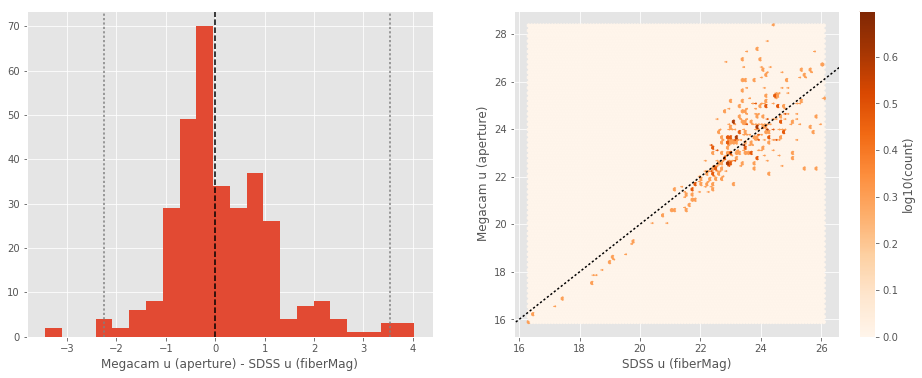

Megacam u (total) - SDSS u (petroMag):
- Median: -0.07
- Median Absolute Deviation: 0.60
- 1% percentile: -2.2449975204467774
- 99% percentile: 3.5394178390502935


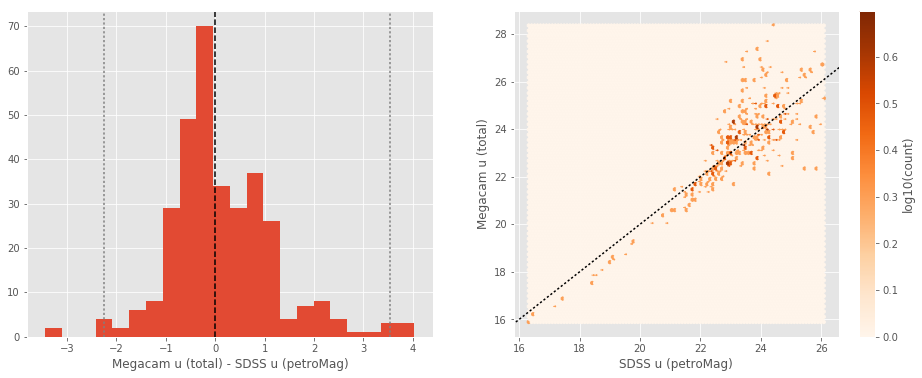

Megacam g (aperture) - SDSS g (fiberMag):
- Median: -0.37
- Median Absolute Deviation: 0.17
- 1% percentile: -1.1048469543457031
- 99% percentile: 0.792029571533203


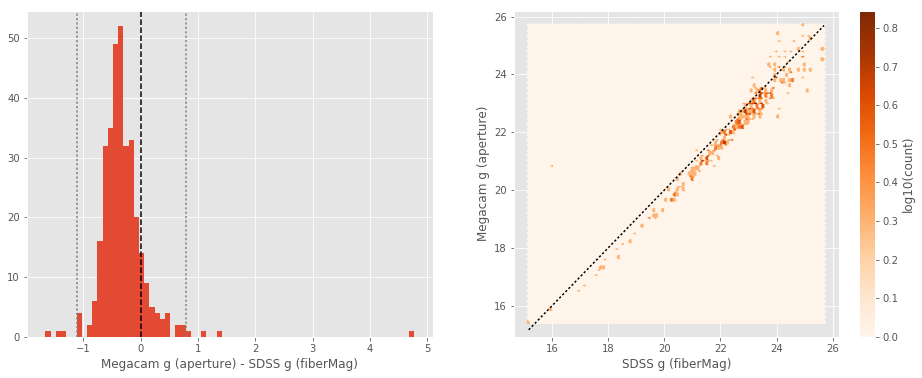

Megacam g (total) - SDSS g (petroMag):
- Median: -0.37
- Median Absolute Deviation: 0.17
- 1% percentile: -1.1048469543457031
- 99% percentile: 0.792029571533203


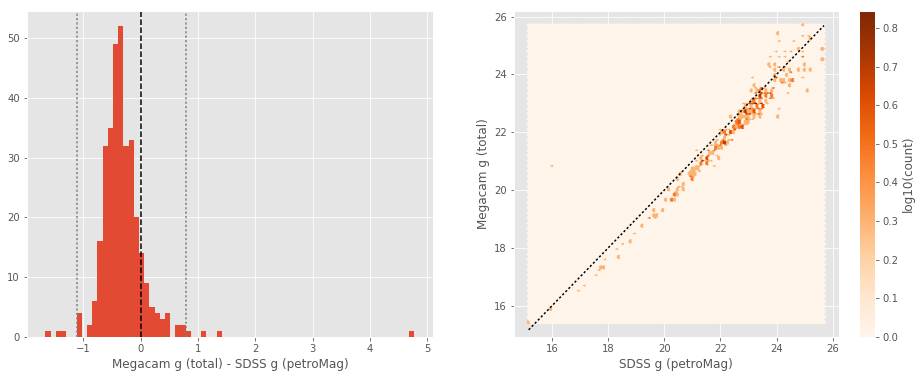

SUPRIME g (aperture) - SDSS g (fiberMag):
- Median: -0.33
- Median Absolute Deviation: 0.18
- 1% percentile: -1.1075844192504882
- 99% percentile: 1.0514772033691402


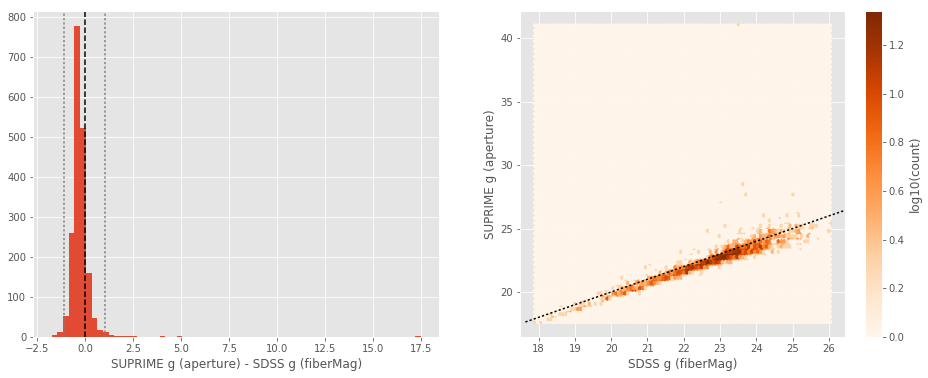

SUPRIME g (total) - SDSS g (petroMag):
- Median: -0.33
- Median Absolute Deviation: 0.18
- 1% percentile: -1.1075844192504882
- 99% percentile: 1.0514772033691402


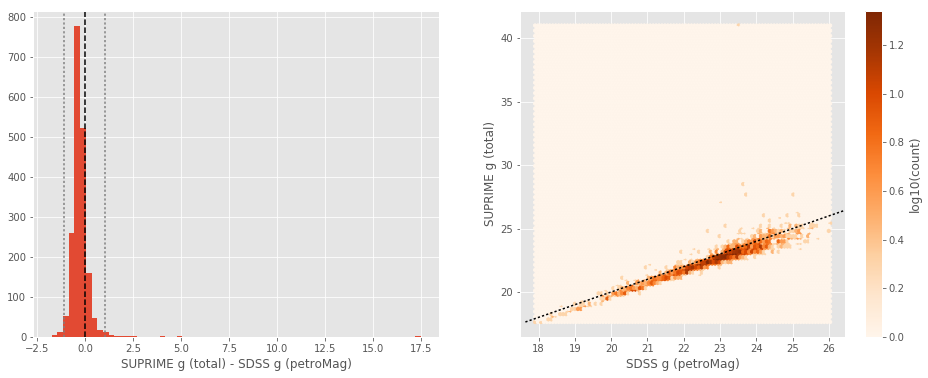

GPC1 g (aperture) - SDSS g (fiberMag):
- Median: -0.59
- Median Absolute Deviation: 0.22
- 1% percentile: -1.8575738525390626
- 99% percentile: 1.766867065429686


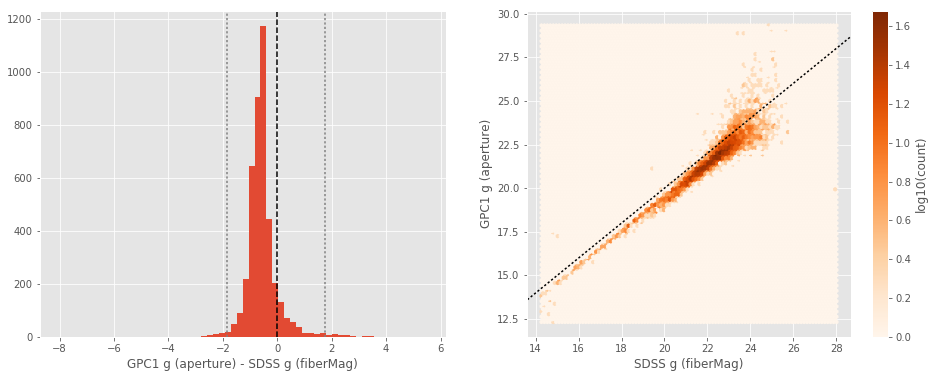

GPC1 g (total) - SDSS g (petroMag):
- Median: -0.59
- Median Absolute Deviation: 0.22
- 1% percentile: -1.8575738525390626
- 99% percentile: 1.766867065429686


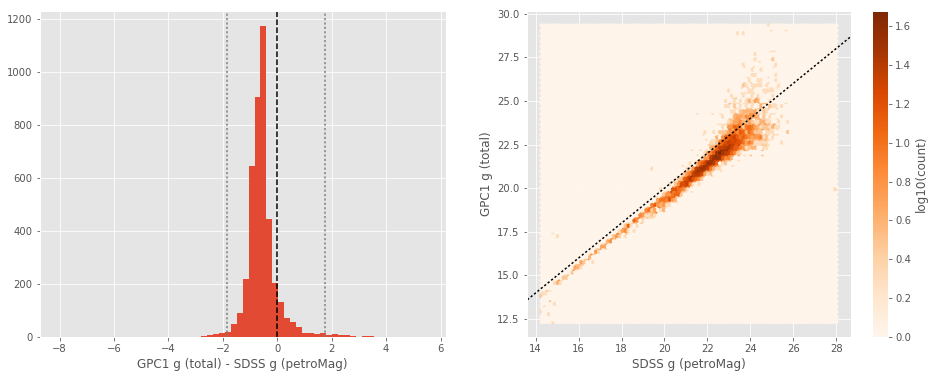

No sources have both SDSS g (fiberMag) and DECam g (aperture) values.
No sources have both SDSS g (petroMag) and DECam g (total) values.
Megacam r (aperture) - SDSS r (fiberMag):
- Median: -0.27
- Median Absolute Deviation: 0.11
- 1% percentile: -0.8903405952453614
- 99% percentile: 0.5735344696044887


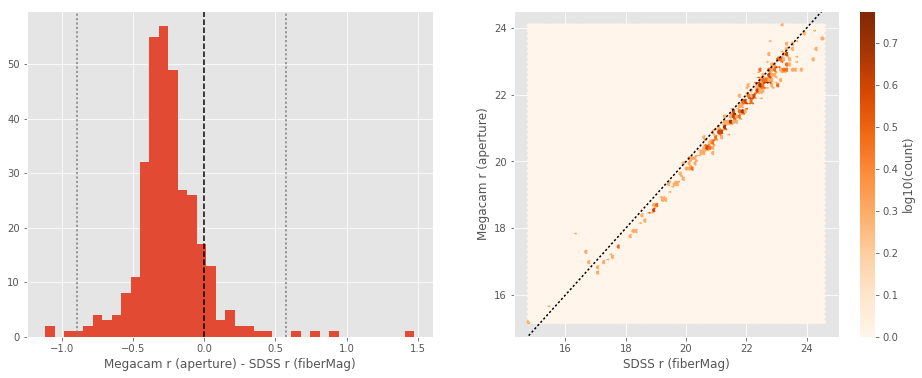

Megacam r (total) - SDSS r (petroMag):
- Median: -0.27
- Median Absolute Deviation: 0.11
- 1% percentile: -0.8903405952453614
- 99% percentile: 0.5735344696044887


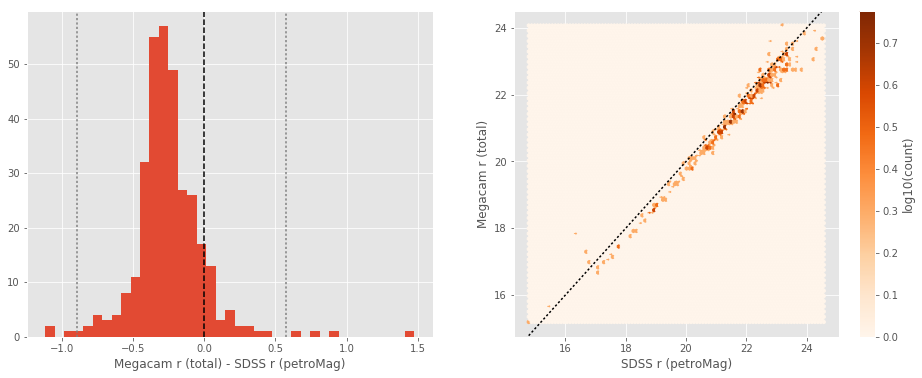

SUPRIME r (aperture) - SDSS r (fiberMag):
- Median: -0.28
- Median Absolute Deviation: 0.14
- 1% percentile: -0.9883334350585936
- 99% percentile: 0.575829849243164


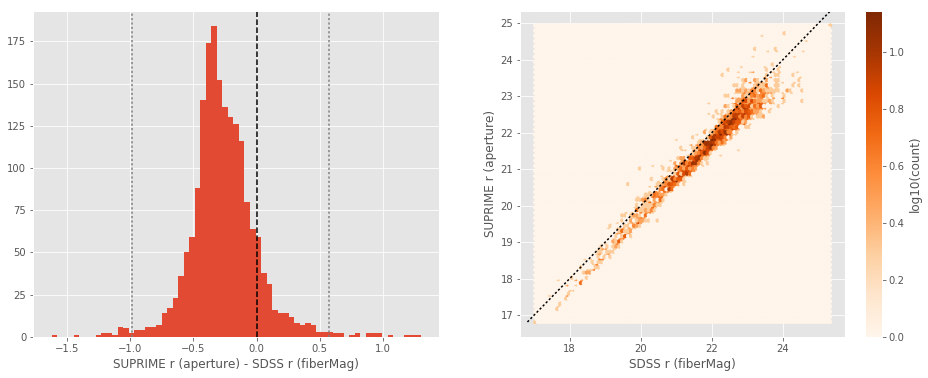

SUPRIME r (total) - SDSS r (petroMag):
- Median: -0.28
- Median Absolute Deviation: 0.14
- 1% percentile: -0.9883334350585936
- 99% percentile: 0.575829849243164


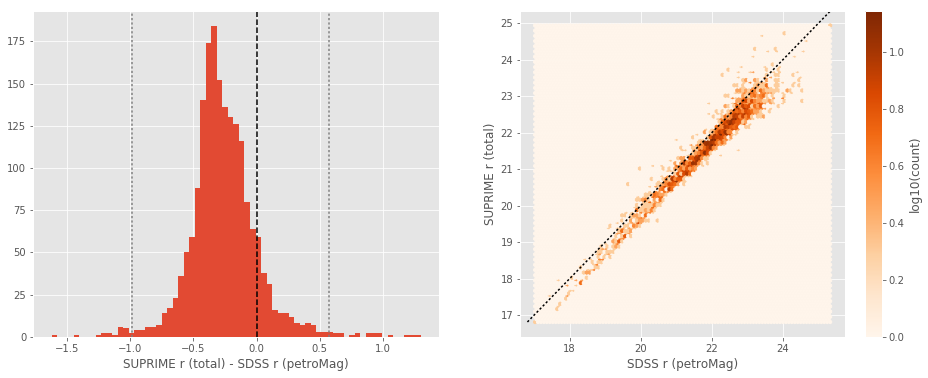

GPC1 r (aperture) - SDSS r (fiberMag):
- Median: -0.46
- Median Absolute Deviation: 0.17
- 1% percentile: -1.3412579536437987
- 99% percentile: 0.880472564697266


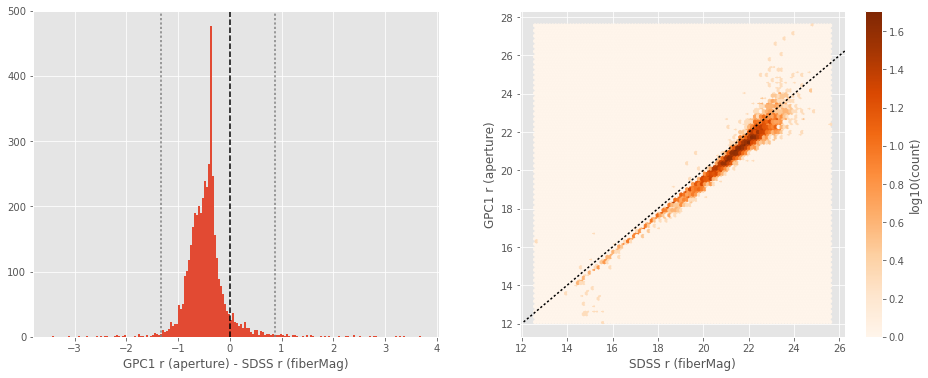

GPC1 r (total) - SDSS r (petroMag):
- Median: -0.46
- Median Absolute Deviation: 0.17
- 1% percentile: -1.3412579536437987
- 99% percentile: 0.880472564697266


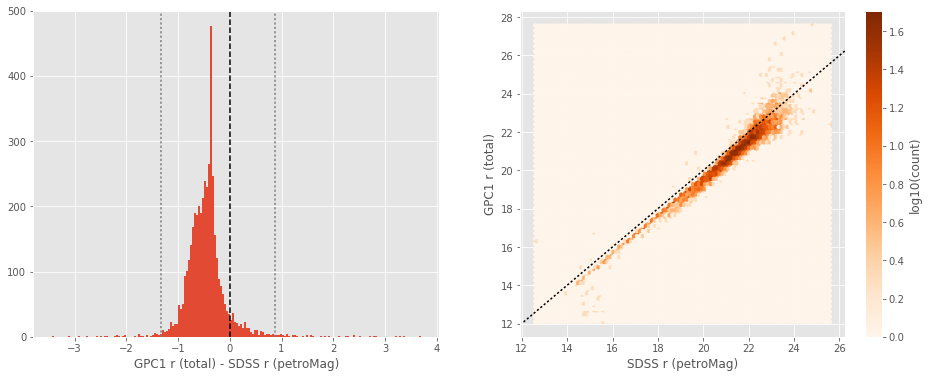

DECam r (aperture) - SDSS r (fiberMag):
- Median: 0.60
- Median Absolute Deviation: 0.39
- 1% percentile: -0.45494407653808594
- 99% percentile: 2.2170973205566407


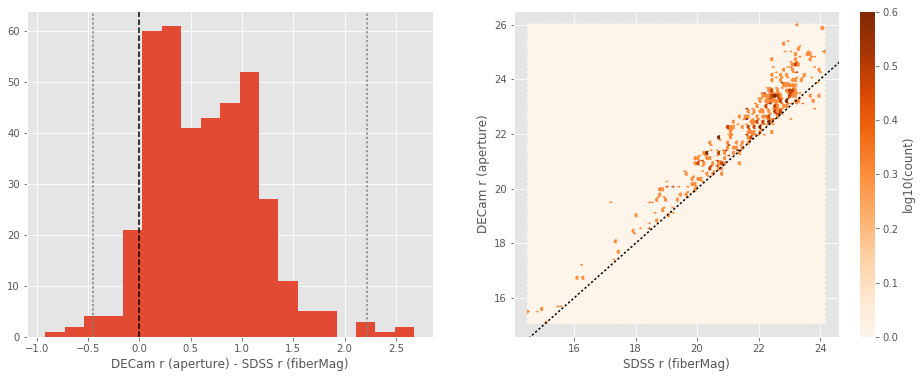

DECam r (total) - SDSS r (petroMag):
- Median: 0.60
- Median Absolute Deviation: 0.39
- 1% percentile: -0.45494407653808594
- 99% percentile: 2.2170973205566407


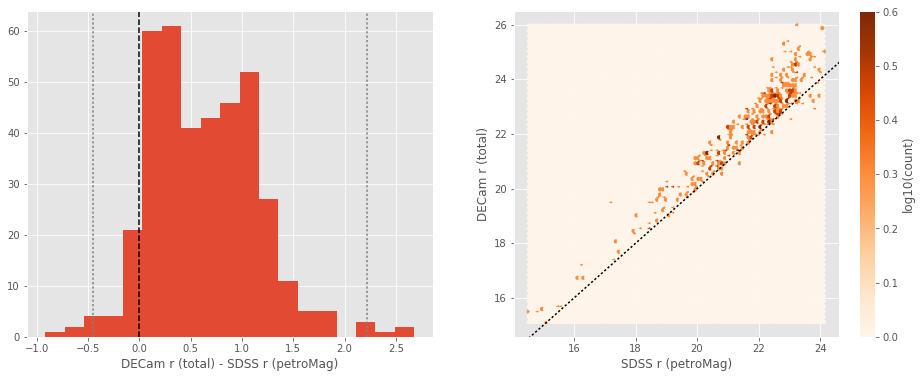

SUPRIME i (aperture) - SDSS i (fiberMag):
- Median: -0.31
- Median Absolute Deviation: 0.14
- 1% percentile: -0.8531522750854492
- 99% percentile: 14.308686256408691


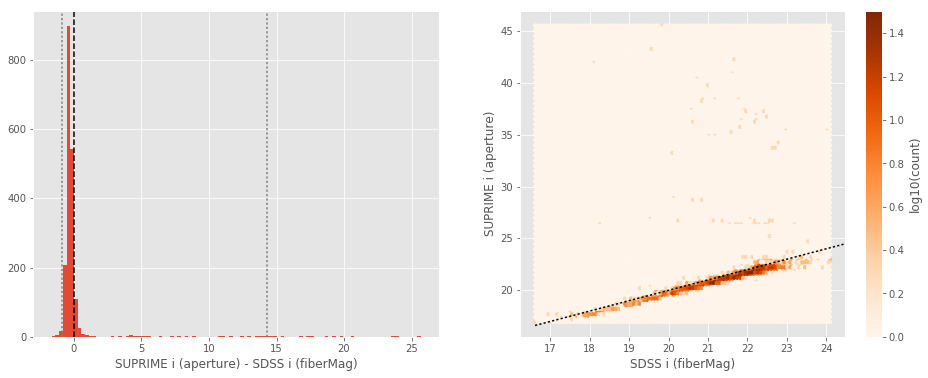

SUPRIME i (total) - SDSS i (petroMag):
- Median: -0.31
- Median Absolute Deviation: 0.14
- 1% percentile: -0.8531522750854492
- 99% percentile: 14.308686256408691


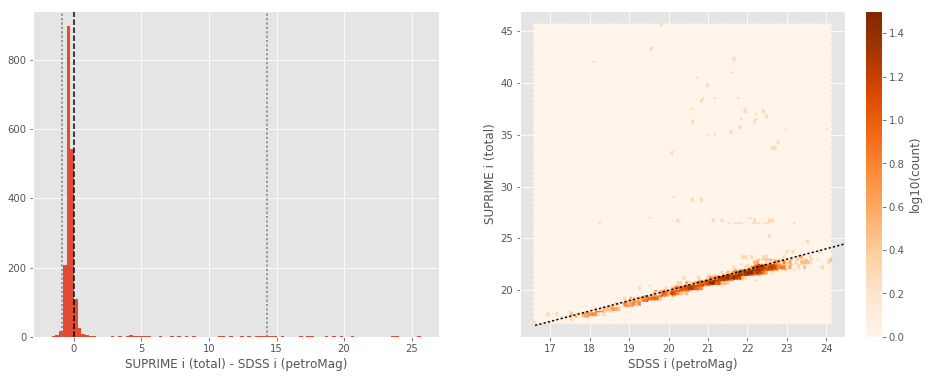

GPC1 i (aperture) - SDSS i (fiberMag):
- Median: -0.44
- Median Absolute Deviation: 0.12
- 1% percentile: -1.0311280632019042
- 99% percentile: 0.27129711151123104


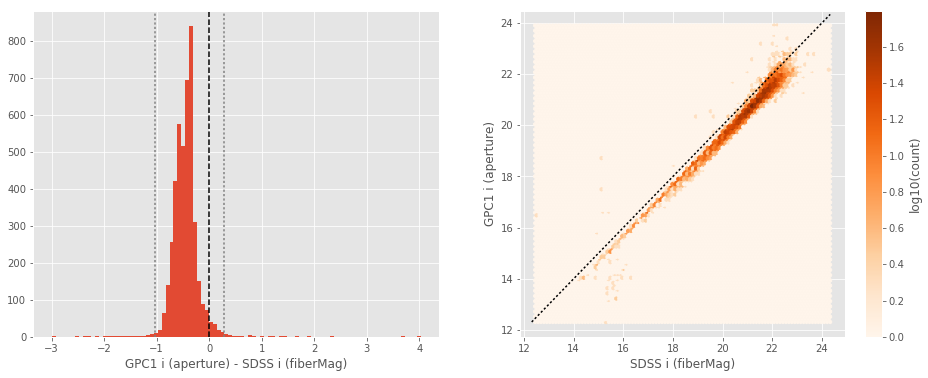

GPC1 i (total) - SDSS i (petroMag):
- Median: -0.44
- Median Absolute Deviation: 0.12
- 1% percentile: -1.0311280632019042
- 99% percentile: 0.27129711151123104


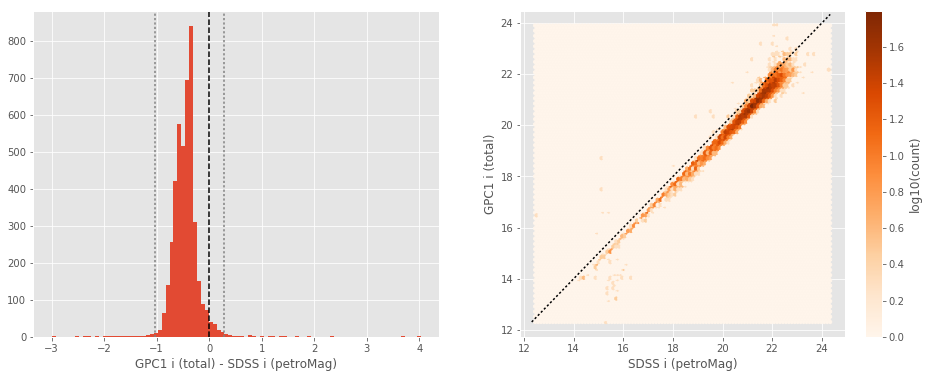

DECam i (aperture) - SDSS i (fiberMag):
- Median: 0.15
- Median Absolute Deviation: 0.27
- 1% percentile: -0.6507194519042969
- 99% percentile: 1.3562511444091798


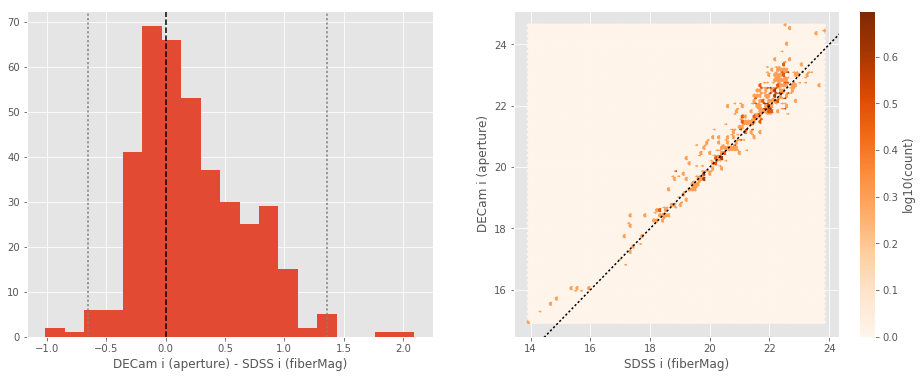

DECam i (total) - SDSS i (petroMag):
- Median: 0.15
- Median Absolute Deviation: 0.27
- 1% percentile: -0.6507194519042969
- 99% percentile: 1.3562511444091798


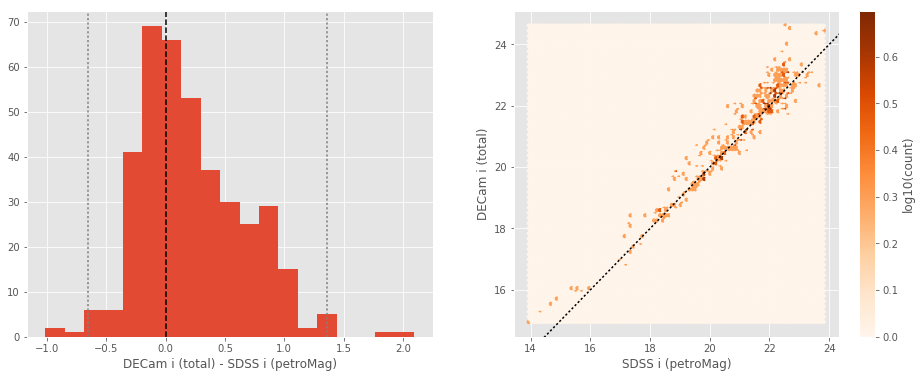

Megacam z (aperture) - SDSS z (fiberMag):
- Median: -0.16
- Median Absolute Deviation: 0.17
- 1% percentile: -0.9846192932128905
- 99% percentile: 1.0305830383300745


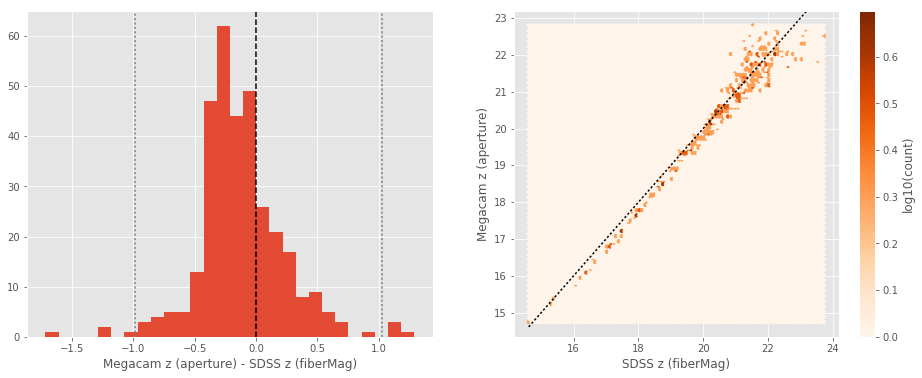

Megacam z (total) - SDSS z (petroMag):
- Median: -0.16
- Median Absolute Deviation: 0.17
- 1% percentile: -0.9846192932128905
- 99% percentile: 1.0305830383300745


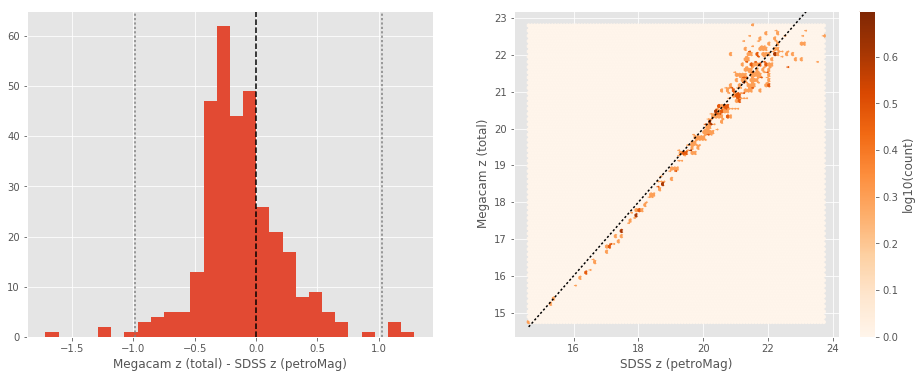

SUPRIME z (aperture) - SDSS z (fiberMag):
- Median: -0.22
- Median Absolute Deviation: 0.22
- 1% percentile: -1.2655384635925293
- 99% percentile: 19.988522815704343


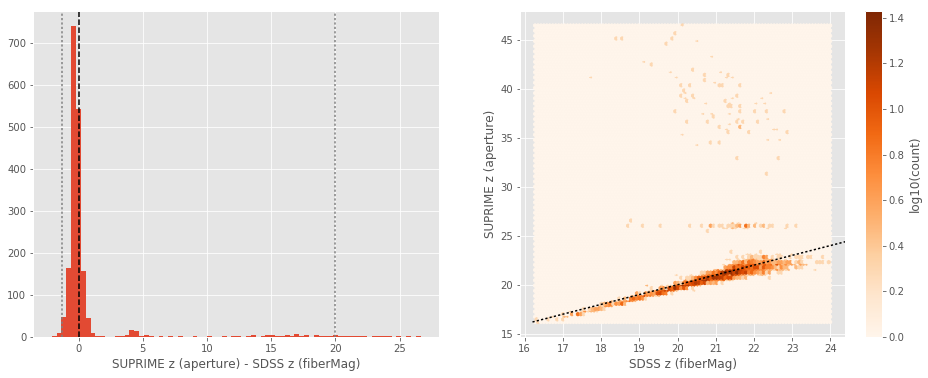

SUPRIME z (total) - SDSS z (petroMag):
- Median: -0.22
- Median Absolute Deviation: 0.22
- 1% percentile: -1.2655384635925293
- 99% percentile: 19.988522815704343


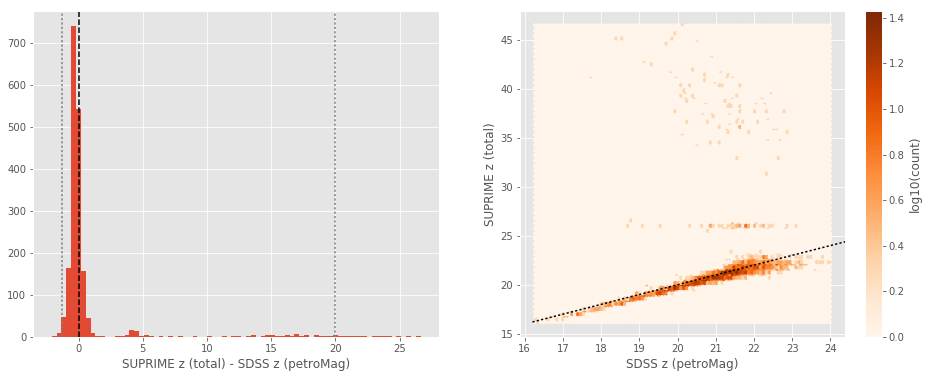

GPC1 z (aperture) - SDSS z (fiberMag):
- Median: -0.35
- Median Absolute Deviation: 0.16
- 1% percentile: -1.3031375885009766
- 99% percentile: 0.7267950820922855


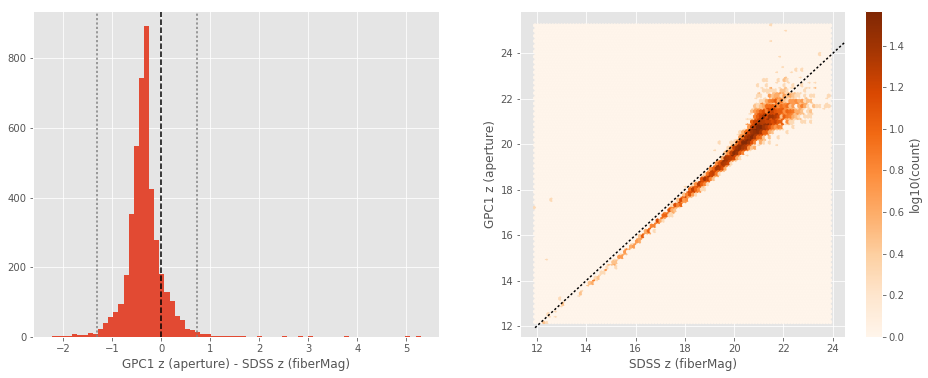

GPC1 z (total) - SDSS z (petroMag):
- Median: -0.35
- Median Absolute Deviation: 0.16
- 1% percentile: -1.3031375885009766
- 99% percentile: 0.7267950820922855


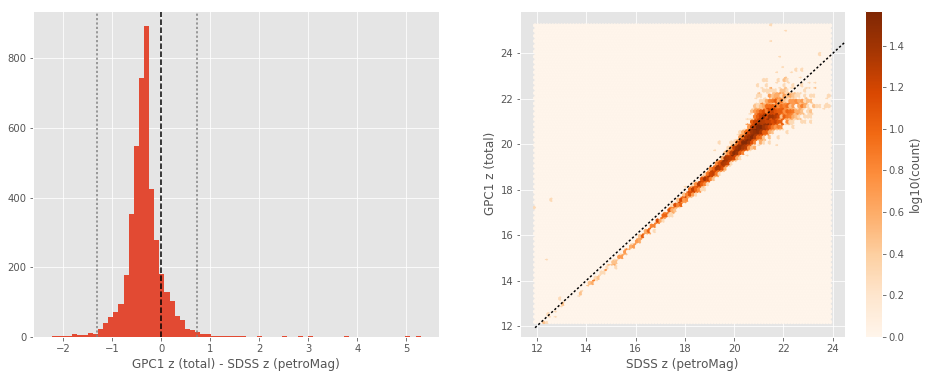

No sources have both SDSS z (fiberMag) and DECam z (aperture) values.
No sources have both SDSS z (petroMag) and DECam z (total) values.
VISTA z (aperture) - SDSS z (fiberMag):
- Median: -0.76
- Median Absolute Deviation: 0.19
- 1% percentile: -1.8024901962280273
- 99% percentile: 10.00298500061035


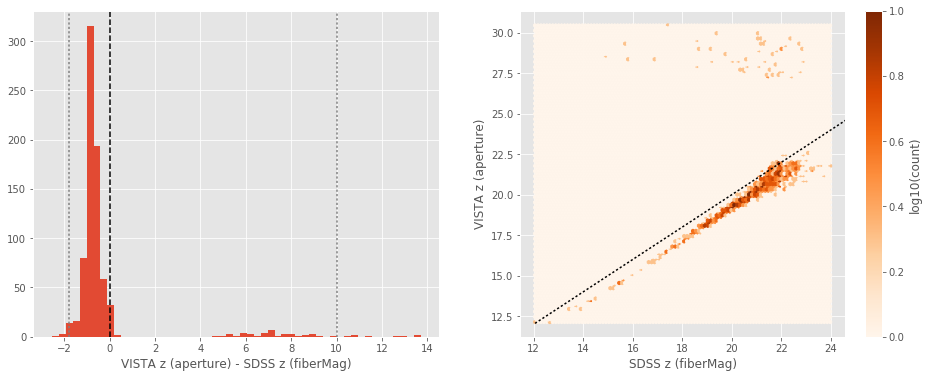

VISTA z (total) - SDSS z (petroMag):
- Median: -0.76
- Median Absolute Deviation: 0.19
- 1% percentile: -1.8024901962280273
- 99% percentile: 10.00298500061035


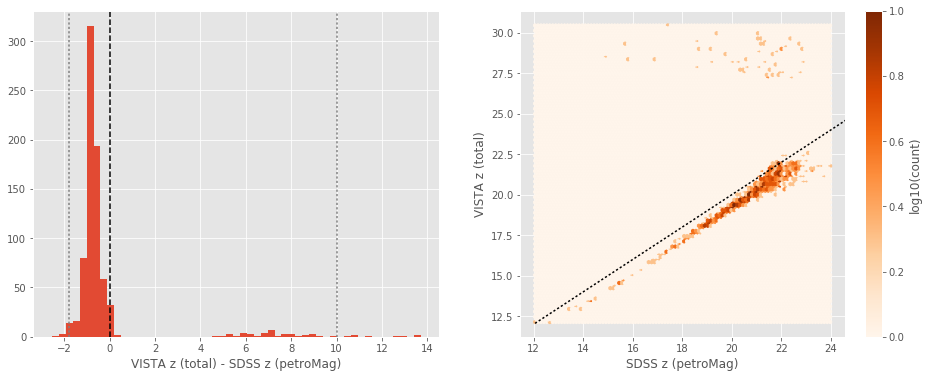

In [12]:
for band_of_a_kind in [u_bands, g_bands, r_bands, i_bands, z_bands]:
    for band in band_of_a_kind:
        
        sdss_mag_ap = sdss["fiberMag_{}".format(band[-1])]
        master_cat_mag_ap = master_catalogue["m_ap_{}".format(band.replace(" ", "_").lower())][ml_sdss_idx]
    
        nb_compare_mags(sdss_mag_ap, master_cat_mag_ap,
                        labels=("SDSS {} (fiberMag)".format(band[-1]), "{} (aperture)".format(band)))
    
        sdss_mag_tot = sdss["petroMag_{}".format(band[-1])]
        master_cat_mag_tot = master_catalogue["m_ap_{}".format(band.replace(" ", "_").lower())][ml_sdss_idx]
        
        nb_compare_mags(sdss_mag_ap, master_cat_mag_ap,
                        labels=("SDSS {} (petroMag)".format(band[-1]), "{} (total)".format(band)))

### III.b - Comparing J and K bands to 2MASS

The catalogue is cross-matched to 2MASS-PSC withing 0.2 arcsecond. We compare the UKIDSS total J and K magnitudes to those from 2MASS.

The 2MASS magnitudes are “*Vega-like*” and we have to convert them to AB magnitudes using the zero points provided on [this page](http://www.ipac.caltech.edu/2mass/releases/allsky/doc/sec6_4a.html):

| Band | Fν - 0 mag (Jy) |
|------|-----------------|
| J    | 1594            |
| H    | 1024            |
| Ks   | 666.7           |

In addition, UKIDSS uses a K band whereas 2MASS uses a Ks (“short”) band, [this page](http://www.ipac.caltech.edu/2mass/releases/allsky/doc/sec6_4b.html) give a correction to convert the K band in a Ks band with the formula:

$$K_{s(2MASS)} = K_{UKIRT} + 0.003 + 0.004 * (J−K)_{UKIRT}$$

In [13]:
# The AB zero point is 3631 Jy
j_2mass_to_ab = 2.5 * np.log10(3631/1595)
k_2mass_to_ab = 2.5 * np.log10(3631/666.7)

In [14]:
twomass = Table.read("../../dmu0/dmu0_2MASS-point-sources/data/2MASS-PSC_XMM-LSS.fits")
twomass_coords = SkyCoord(twomass['raj2000'], twomass['dej2000'])

idx, d2d, _ = twomass_coords.match_to_catalog_sky(master_catalogue_coords)
mask = (d2d < 0.2 * u.arcsec)

twomass = twomass[mask]
ml_twomass_idx = idx[mask]

UKIDSS J (total) - 2MASS J:
- Median: 0.04
- Median Absolute Deviation: 0.04
- 1% percentile: -0.9121613300992792
- 99% percentile: 0.18395240754110204


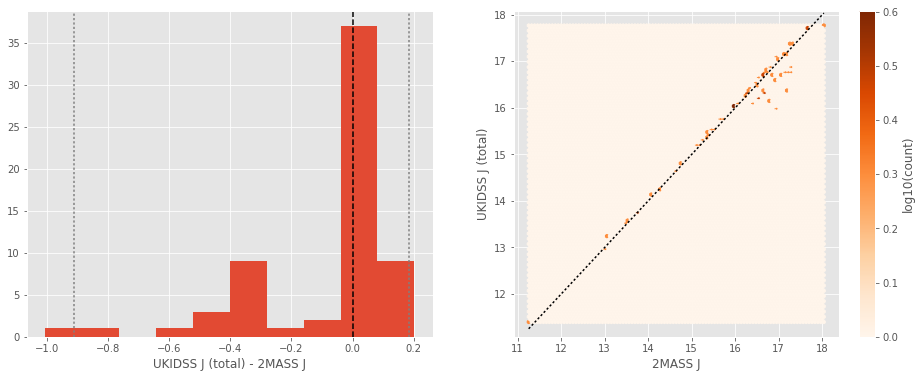

In [15]:
nb_compare_mags(twomass['jmag'] + j_2mass_to_ab, master_catalogue['m_ukidss_j'][ml_twomass_idx],
                labels=("2MASS J", "UKIDSS J (total)"))

UKIDSS Ks-like (total) - 2MASS Ks:
- Median: 0.08
- Median Absolute Deviation: 0.09
- 1% percentile: -0.9823547354754003
- 99% percentile: 0.4885112742368186


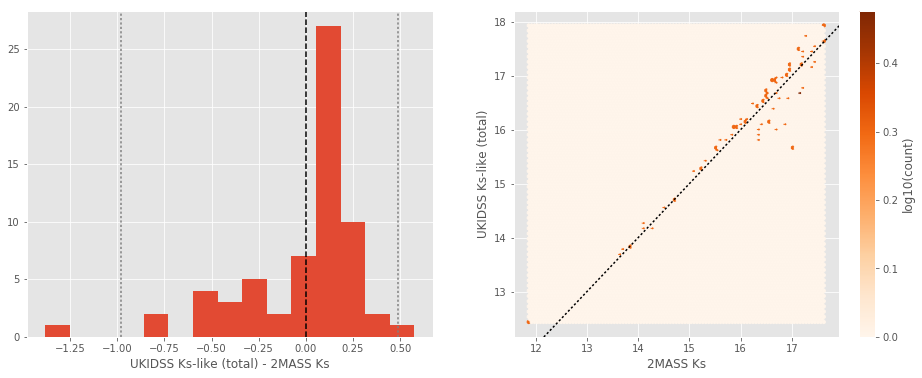

In [16]:
ukidss_ks_like = master_catalogue['m_ukidss_k'] + 0.003 + 0.004 * (
    master_catalogue['m_ukidss_j'] - master_catalogue['m_ukidss_k'])
nb_compare_mags(twomass['kmag'] + k_2mass_to_ab, ukidss_ks_like[ml_twomass_idx],
                labels=("2MASS Ks", "UKIDSS Ks-like (total)"))

## IV - Comparing aperture magnitudes to total ones.

Number of source used: 8106 / 188737 (4.29%)
Number of source used: 48396 / 188737 (25.64%)
Number of source used: 1914 / 188737 (1.01%)
Number of source used: 2791 / 188737 (1.48%)


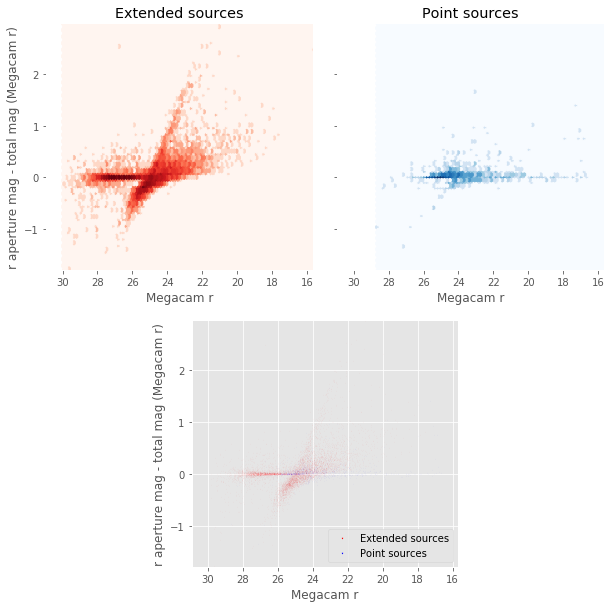

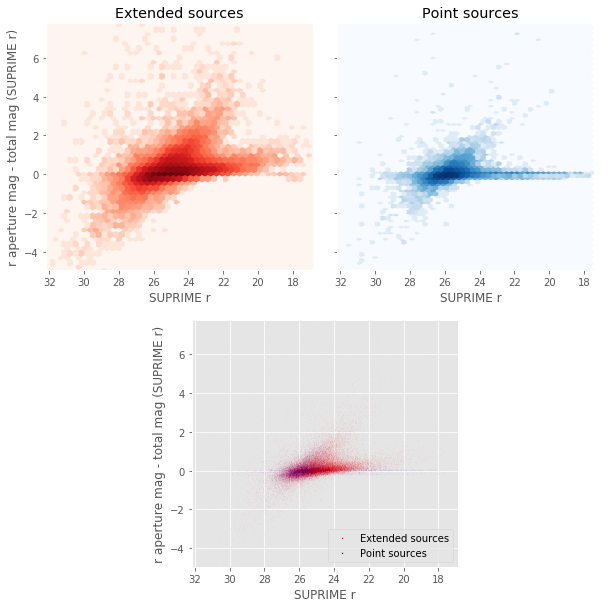

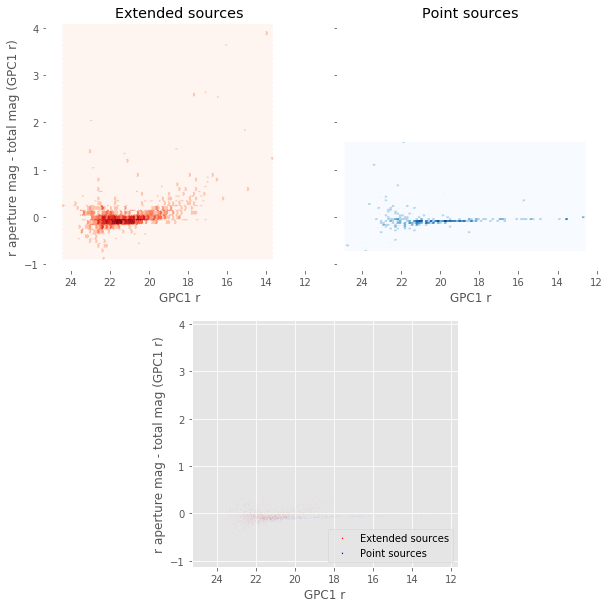

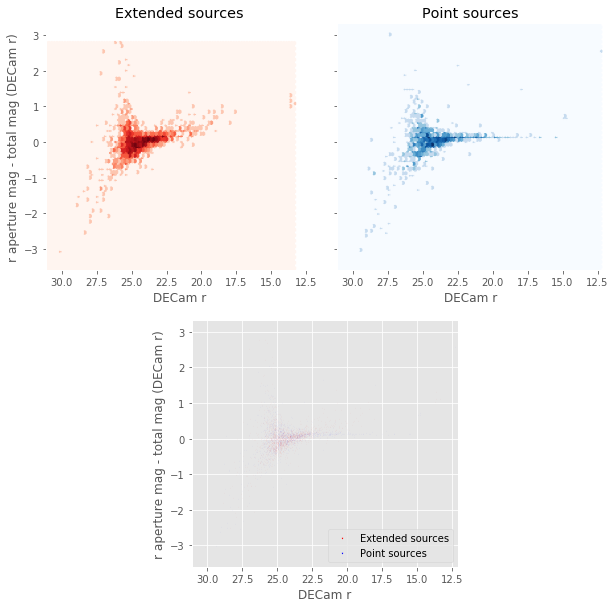

In [19]:
for band in r_bands:
    nb_ccplots(
        master_catalogue["m_{}".format(band.replace(" ", "_").lower())],
        master_catalogue["m_ap_{}".format(band.replace(" ", "_").lower())] - master_catalogue["m_{}".format(band.replace(" ", "_").lower())],
        band, "r aperture mag - total mag ({})".format(band),
        master_catalogue["stellarity"],
        invert_x=True
    )

## V - Color-color and magnitude-color plots

In [20]:
nb_ccplots(
    master_catalogue['m_suprime_g'] - master_catalogue['m_suprime_i'],
    master_catalogue['m_ukidss_j'] - master_catalogue['m_ukidss_k'],
    "g - i (Suprime)", "J - K (UKIDSS)",
    master_catalogue["stellarity"]
)

Number of source used: 0 / 188737 (0.00%)
HELP warning: no sources with observations in both bands


/Users/rs548/anaconda/envs/herschelhelp_internal/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in subtract
  from ipykernel import kernelapp as app


In [21]:
nb_ccplots(
    master_catalogue['m_suprime_i'] - master_catalogue['m_irac_i1'],
    master_catalogue['m_suprime_g'] - master_catalogue['m_suprime_i'],
    "Suprime i - IRAC1", "g - i (Suprime)",
    master_catalogue["stellarity"]
)

Number of source used: 0 / 188737 (0.00%)
HELP warning: no sources with observations in both bands


/Users/rs548/anaconda/envs/herschelhelp_internal/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in subtract
  app.launch_new_instance()


Number of source used: 6855 / 188737 (3.63%)


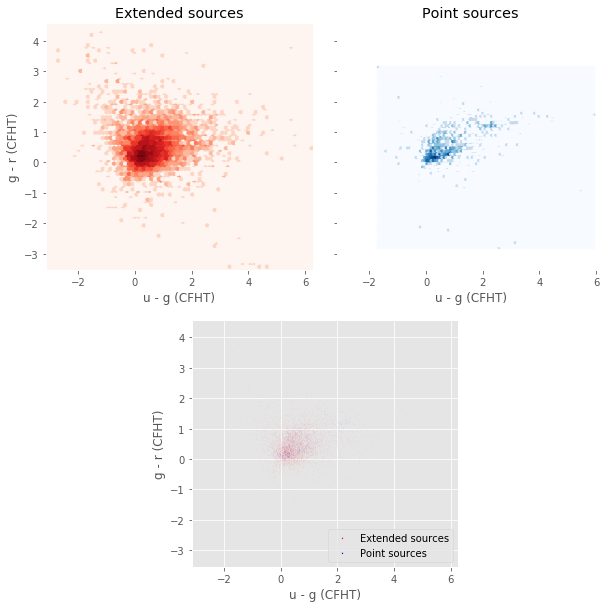

In [22]:
nb_ccplots(
    master_catalogue['m_megacam_u'] - master_catalogue['m_megacam_g'],
    master_catalogue['m_megacam_g'] - master_catalogue['m_megacam_r'],
    "u - g (CFHT)", "g - r (CFHT)",
    master_catalogue["stellarity"]
)

In [23]:
nb_ccplots(
    master_catalogue['m_ukidss_j'] - master_catalogue['m_ukidss_k'],
    master_catalogue['m_suprime_g'] - master_catalogue['m_ukidss_j'],
    "J - K (UKIDSS)", "g - J (Suprime, UKIDSS)",
    master_catalogue["stellarity"]
)

Number of source used: 0 / 188737 (0.00%)
HELP warning: no sources with observations in both bands


In [26]:
nb_ccplots(
    master_catalogue['m_suprime_i'] - master_catalogue['m_suprime_z'],
    master_catalogue['m_suprime_z'] - master_catalogue['m_ukidss_j'],
    "i - z (Suprime)", "z - J (Suprime, UKIDSS)",
    master_catalogue["stellarity"]
)

Number of source used: 0 / 188737 (0.00%)
HELP warning: no sources with observations in both bands


/Users/rs548/anaconda/envs/herschelhelp_internal/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in subtract
  from ipykernel import kernelapp as app


Number of source used: 34 / 188737 (0.02%)


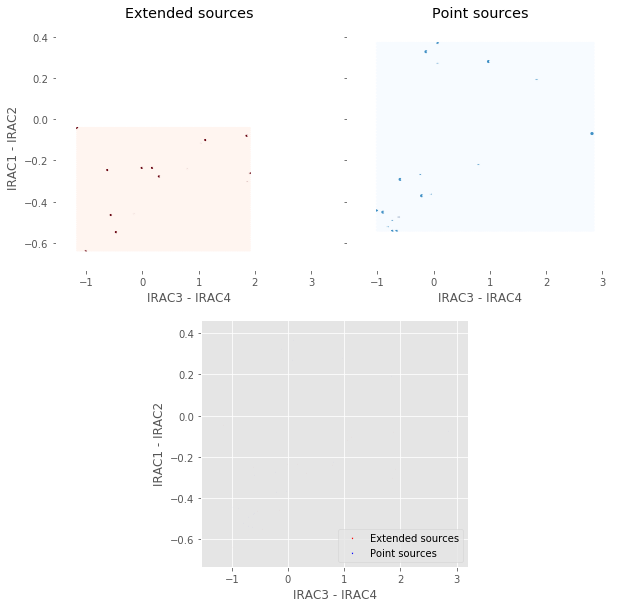

In [25]:
nb_ccplots(
    master_catalogue['m_irac_i3'] - master_catalogue['m_irac_i4'],
    master_catalogue['m_irac_i1'] - master_catalogue['m_irac_i2'],
    "IRAC3 - IRAC4", "IRAC1 - IRAC2",
    master_catalogue["stellarity"]
)